# ЛАБОРАТОРНАЯ РАБОТА N 3
# СПОСОБЫ ПОЛУЧЕНИЕ СЛУЧАЙНЫХ ЧИСЕЛ С ТРЕБУЕМЫМ ЗАКОНОМ                     РАСПРЕДЕЛЕНИЯ

**Цель работы**
1. Практическое освоение методов получения случайных
величин, имеющих непрерывный характер распределения.

2. Разработка программных датчиков дискретных случайных
величин.

3. Оценка точности моделирования: вычисление математического ожидания и дисперсии, сравнение полученных
оценок с соответствующими теоретическими значениями.

4. Гpафическое пpедставление плотности распределения
и интегральной функции pаспpеделения.



In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
n=10**4

In [5]:
def cumulative(density):
    dens = [0]
    n = sum(density)
    for i in range(len(density)):
        dens.append(density[i] / n + dens[i])
    return dens

## Равномерное распределение (непрервыное)

In [6]:
def p_uniform(a, b):
    u = random.random()
    r = (b - a) * u + a
    return r

In [7]:
uniform_dist = np.array([p_uniform(1, 100) for i in range(n)])
uniform_mean = uniform_dist.mean()
uniform_var = uniform_dist.var()

In [8]:
print("Оценка")
print("M =", uniform_mean)
print("D =", uniform_var)
print("Погрешность")
print('m', abs(50.5 - uniform_mean))
print('d', abs(816.75 - uniform_var))

Оценка
M = 50.7724510295495
D = 815.2917311370842
Погрешность
m 0.27245102954950084
d 1.4582688629158156


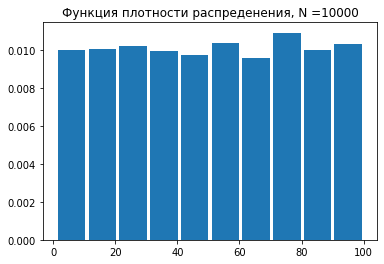

In [9]:
plt.title('Функция плотности распреденения, N =' + str(n))
hist, bin_edges, _ = plt.hist(uniform_dist, density=True, rwidth = 0.9)
plt.show()

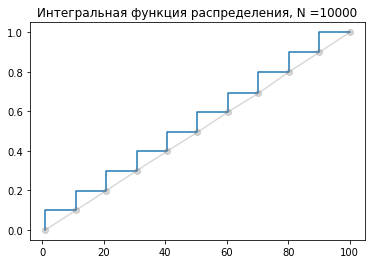

In [10]:
plt.title('Интегральная функция распределения, N =' + str(n))
plt.step(bin_edges, cumulative(hist), label='pre (default)')
plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
plt.show()

## Нормальное распределение

### Алгоритм, основанный на использовании центральной предельной теоремы

In [11]:
def p_norm1(m, sigma):
    s = 0
    for i in range(12):
        s += random.random()
    return m + (s - 6) * sigma

In [12]:
norm1 = np.array([p_norm1(0, 1) for i in range(n)])
norm1_mean = norm1.mean()
norm1_var = norm1.var()

### Алгоритм Бокс-Миллера

In [13]:
def p_norm2(m, sigma):
    u1, u2 = random.random(), random.random()
    z1 = (-2 * np.log(u2)) ** 0.5 * np.cos(2 * np.pi * u1)
    return z1

In [14]:
norm2 = np.array([p_norm2(0, 1) for i in range(n)])
norm2_mean = norm2.mean()
norm2_var = norm2.var()

1 алгоритм

Оценка
M = -0.008778107563967977
D = 1.0045924322629434
Погрешность
m 0.008778107563967977
d 0.004592432262943369


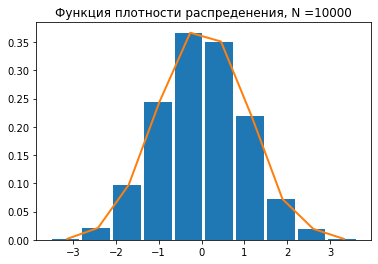

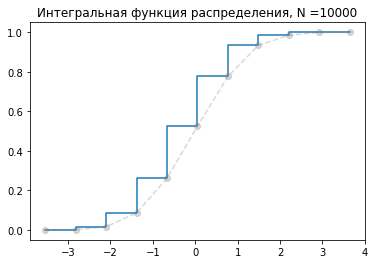

2 алгоритм

Оценка
M = 0.016317544357314837
D = 1.0126405961461757
Погрешность
m 0.016317544357314837
d 0.012640596146175742


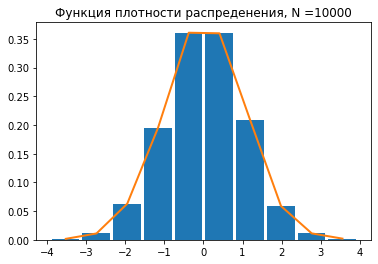

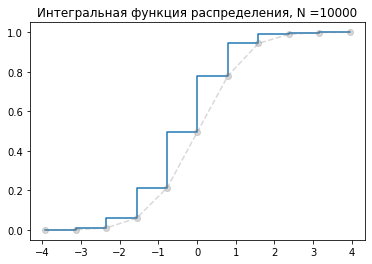

In [15]:
for i, norm in enumerate([norm1, norm2]):
    M, D = norm.mean(), norm.var()
    print(str(i + 1) + ' алгоритм\n')
    print("Оценка")
    print("M =", M)
    print("D =", D)
    print("Погрешность")
    print('m', abs(0. - M))
    print('d', abs(1. - D))
    
    plt.title('Функция плотности распреденения, N =' + str(n))
    
    hist, bin_edges, _ = plt.hist(norm, density=True, rwidth=0.9)
    plt.plot(list(map(lambda x: x + 0.4, bin_edges[:-1])), hist, lw=2)
    plt.show()
    
    plt.title('Интегральная функция распределения, N =' + str(n))
    plt.step(bin_edges, cumulative(hist), label='pre (default)')
    plt.plot(bin_edges, cumulative(hist), 'o--', color='grey', alpha=0.3)
    plt.show()

## Экспоненциальное распределение

In [16]:
def p_exp(beta):
    u = random.random()
    x = -beta * np.log(u)
    return x

In [17]:
exp = np.array([p_exp(1) for i in range(n)])
exp_mean = exp.mean()
exp_var = exp.var()

In [18]:
print("Оценка")
print("M =", exp_mean)
print("D =", exp_var)
print("Погрешность")
print('m', abs(1. - exp_mean))
print('d', abs(1. - exp_var))

Оценка
M = 1.0033837932824405
D = 1.0048001040717303
Погрешность
m 0.0033837932824405392
d 0.00480010407173026


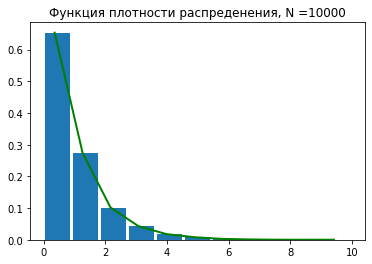

In [19]:
plt.title('Функция плотности распреденения, N =' + str(n))
hist, bin_edges, _ = plt.hist(exp, density=True, bins=11, rwidth = 0.9)
plt.plot(list(map(lambda x: x + 0.35, bin_edges[:-1])), hist, lw = 2, color='g')
plt.show()

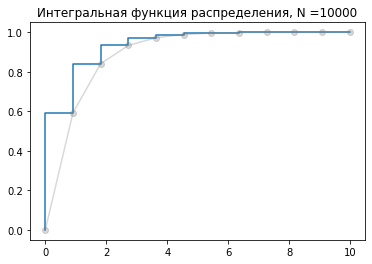

In [20]:
plt.title('Интегральная функция распределения, N =' + str(n))
plt.step(bin_edges, cumulative(hist), label='pre (default)')
plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
plt.show()

## Хи-квадрат распределение

In [21]:
def p_chi_square(n):
    s = 0
    for i in range(n):
        s += p_norm1(0, 1) ** 2
    return s

In [22]:
chi = np.array([p_chi_square(10) for i in range(n)])
chi_mean = chi.mean()
chi_var = chi.var()

In [23]:
print("Оценка")
print("M =", chi_mean)
print("D =", chi_var)
print("Погрешность")
print('m', abs(10. - chi_mean))
print('d', abs(20. - chi_var))

Оценка
M = 10.128986885281437
D = 19.587966028157215
Погрешность
m 0.12898688528143687
d 0.412033971842785


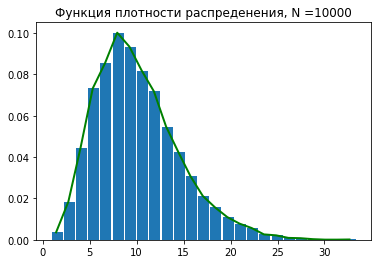

In [24]:
plt.title('Функция плотности распреденения, N =' + str(n))
hist, bin_edges, _ = plt.hist(chi, density=True, bins=25, rwidth = 0.9)
plt.plot(list(map(lambda x: x + 0.55, bin_edges[:-1])), hist, lw = 2, color='g')
plt.show()

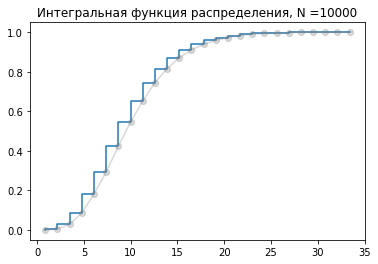

In [25]:
plt.title('Интегральная функция распределения, N =' + str(n))
plt.step(bin_edges, cumulative(hist), label='pre (default)')
plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
plt.show()

## Распределение Стьюдента

In [26]:
def p_student(n):
    z = p_norm1(0, 1)
    y = p_chi_square(n)
    t = z / (y/n)**0.5
    return t

In [27]:
student = np.array([p_student(10) for i in range(n)])
student_mean = student.mean()
student_var = student.var()

In [28]:
print("Оценка")
print("M =", student_mean)
print("D =", student_var)
print("Погрешность")
print('m', abs(0. - student_mean))
print('d', abs(1.25 - student_var))

Оценка
M = -0.013387238457268125
D = 1.2616496689184353
Погрешность
m 0.013387238457268125
d 0.01164966891843533


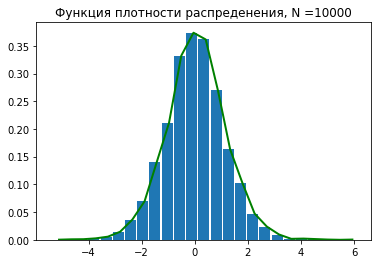

In [29]:
plt.title('Функция плотности распреденения, N =' + str(n))
hist, bin_edges, _ = plt.hist(student, density=True, bins=25, rwidth = 0.9)
plt.plot(list(map(lambda x: x + 0.3, bin_edges[:-1])), hist, lw = 2, color='g')
plt.show()

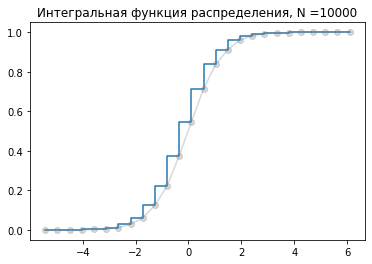

In [30]:
plt.title('Интегральная функция распределения, N =' + str(n))
plt.step(bin_edges, cumulative(hist), label='pre (default)')
plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
plt.show()

## Индивидуальное задание 3 вариант

**Постановка задачи**

Смоделировать   случайную   величину   X, имеющую закон распределения Вейбулла с параметрами m =2 и λ=1 (алгоритм приведен в лекции №3). На основе выборки объема 100 исследовать статистические характеристики случайной величины X: построить гистограмму распределения, провести проверку согласия эмпирического распределения теоретическому критерием Пирсона с уровнем значимости 0,1.

In [182]:
from scipy.stats import weibull_min, chisquare
n_ind = 10**2
c = 2

In [65]:
def p_ind(m, l):
    u = random.random()
    r = l * (-np.log(u))**(1/m)
    return r

In [67]:
x = np.linspace(weibull_min.ppf(0.01, c),
                weibull_min.ppf(0.99, c), 100)

In [169]:
dist = np.array([p_ind(2, 1) for i in range(n_ind)])

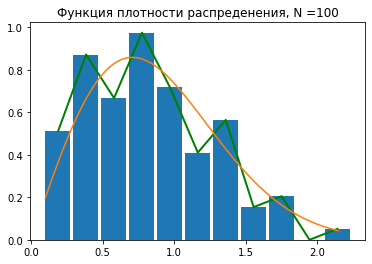

In [209]:
plt.title('Функция плотности распреденения, N =' + str(n_ind))
hist, bin_edges, _ = plt.hist(dist, density=True, bins=11, rwidth = 0.9)
plt.plot(list(map(lambda x: x + 0.1, bin_edges[:-1])), hist, lw = 2, color='g')
plt.plot(x, weibull_min.pdf(x, c))
plt.show()

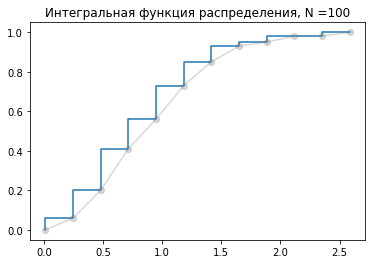

In [162]:
plt.title('Интегральная функция распределения, N =' + str(n_ind))
plt.step(bin_edges, cumulative(hist), label='pre (default)')
plt.plot(bin_edges, cumulative(hist), 'o-', color='grey', alpha=0.3)
plt.show()

In [194]:
def pirson(dist, bin_edges):
    d = []
    for i in range(len(hist) - 1):
        l = float(len(dist[(dist<=hist[i+1]) & (dist>=hist[i])]))
        d.append(l)
    return np.array(d)
    #return d

In [203]:
obs = pirson(dist, hist)

In [196]:
weib_dist = weibull_min.rvs(c, size=10**6)

In [201]:
exp = pirson(weib_dist, hist) / 10**4

In [ ]:
temp = ((obs - exp)**2 / exp)
chi = temp[np.logical_not(np.isnan(temp))].sum()

Критическое значение для 10 степеней свободы и уровня значимости 0.1 - это 15.987

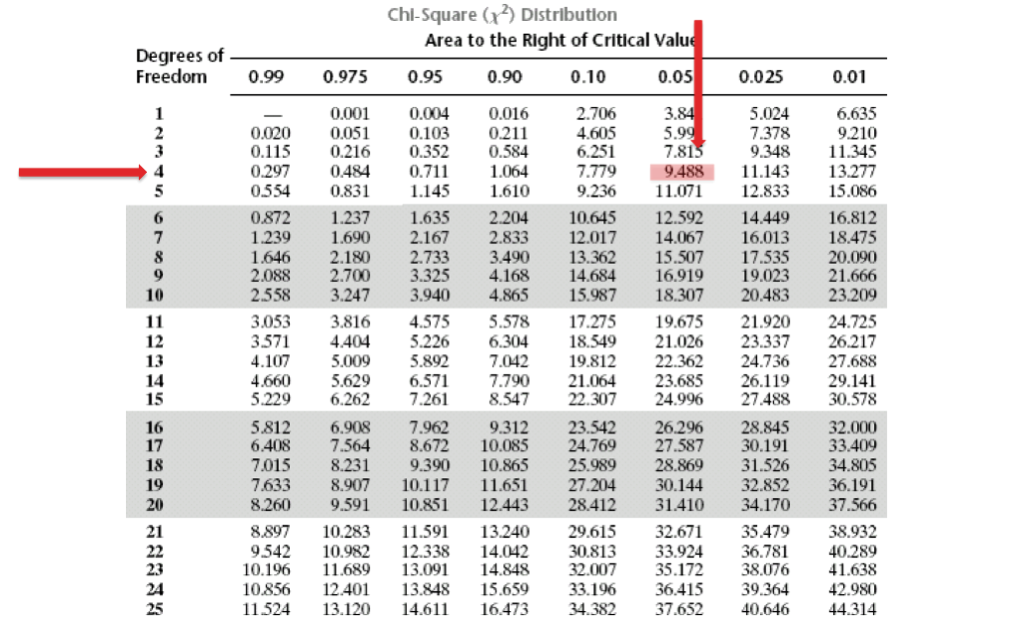

In [226]:
chi_crit = 15.987

In [227]:
chi, chi_crit

(7.447365256296285, 15.987)

Получевшееся значение меньше критического, значит нет оснований отклонить нулевую гипотезу и распределение соответствует распределению Вейбулла

## Выводы

- Все рассмотренные способы получения распределений позволяют получать распределения, у которых точечная оценка близка к теоретической
- Построенные графики распределений похожи на теоретические
- В качестве индивидуального задания была смоделирована случайная величина с распределением Вейбулла, была проведена проверка согласия эмпирического распределения Пирсона, нулевая гипотеза о схожести распределения не имеет достаточно оснований для ее отвержения